In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os 
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


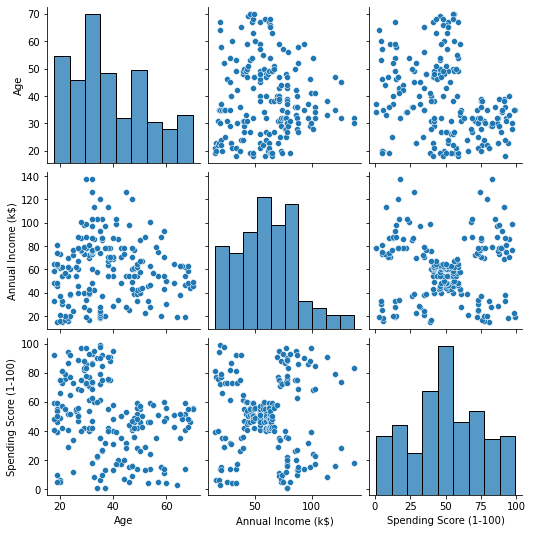

In [6]:
# show visualizations using seaborn

sns.pairplot(df.iloc[:,[2,3,4]])

In [7]:
# perform Min-Max scaling before carrying out clustering

from sklearn.preprocessing import StandardScaler
X = df.iloc[:,[3,4]].values
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

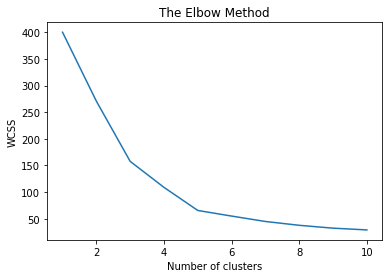

In [9]:
# Using the Elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

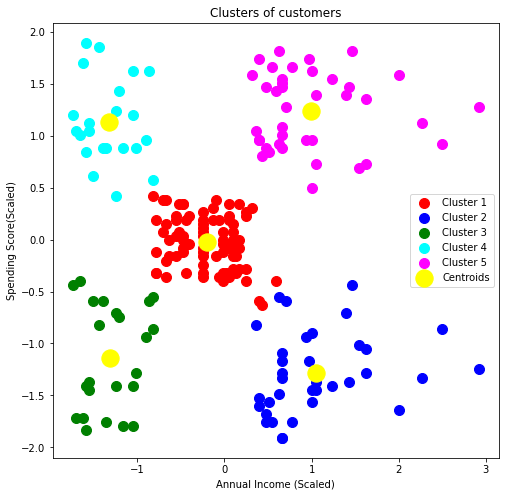

In [13]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()


## Hierarchical Clustering

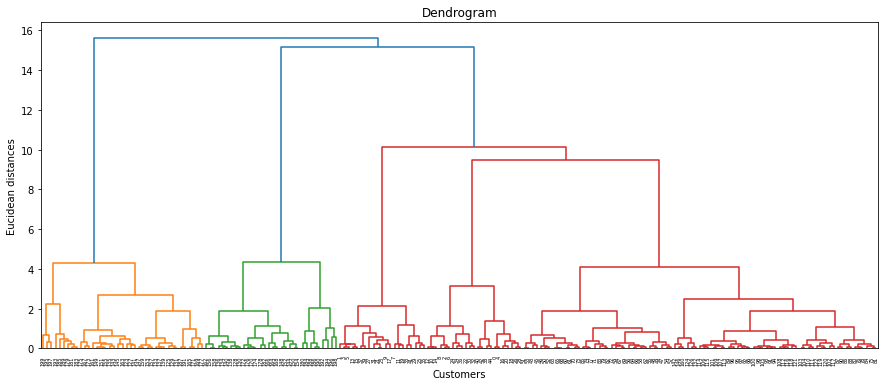

In [16]:
# Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucidean distances')
plt.show()

In [22]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [23]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

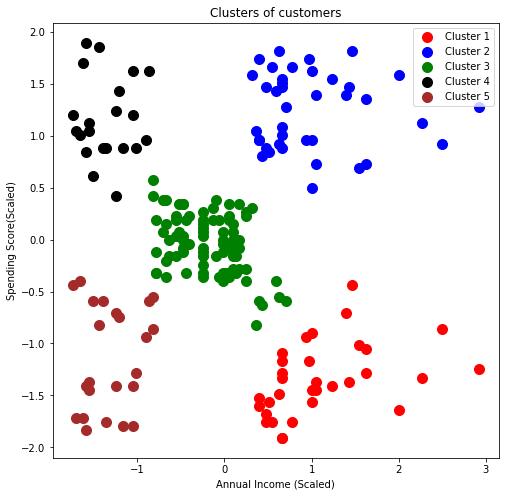

In [30]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()

## DBSCAN

In [25]:
"""
 DBSCAN, which stands for (Density Based Spatial Clustering of Applications with Noise) is a clustering algorithm that
 defines as continuous regions of high density and works well if all the clusters are dense enough and 
 well separated by low-density regions.
 
 --> There are two hyperparameters of DBSCAN:
 - Epsilon (e)
 - minPoints (n)
 
"""

'\n DBSCAN is a clustering algorithm that defines as continuous regions of high density and works well if all the \n clusters are dense enough and well separated by low-density regions.\n \n -- There are two hyperparameters of DBSCAN:\n - Epsilon (e)\n - minPoints (n)\n \n'

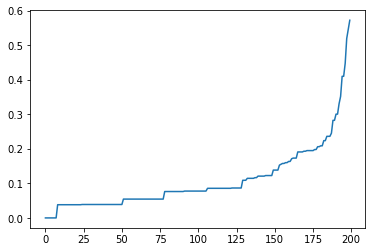

In [26]:
# calculating for Nearest Neighours

from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [27]:
# instantiating DBSCAN object using 'fit_predict()'

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

In [28]:
# viewing/inspecting the array of clusters that has been generated
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

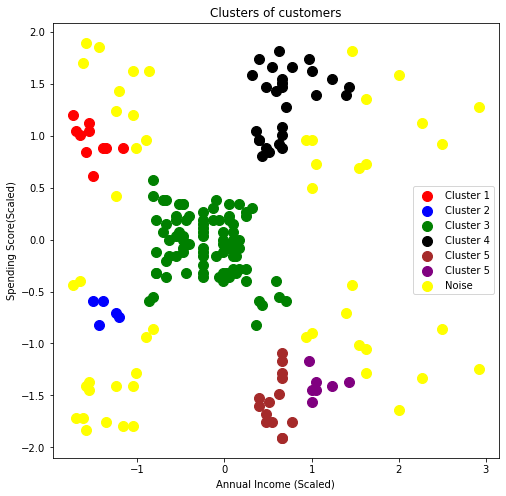

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'yellow', label = 'Noise')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()

## Clustering Data with Higher Dimensionality

In [34]:
financials = pd.read_csv('costpercompany.csv')
financials

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636
5,Southern,1.05,12.60,150,56.7,2.7,10140,0.0,1.108
6,Shell,1.95,10.58,185,36.0,8.2,20004,26.7,1.305
7,San Diego,0.76,6.40,136,61.9,9.0,5714,8.3,1.920
8,Puget,1.16,9.90,252,56.0,9.2,15991,0.0,0.620
9,Pacific,0.96,7.60,164,62.2,-0.1,6468,0.9,1.400


In [35]:
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


In [36]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


In [37]:
financials.describe()

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.402759,10.488966,172.448276,46.862069,4.906897,13024.517241,16.110345,1.173621
std,0.699065,3.564261,60.520709,28.265936,4.572428,9120.761558,18.885356,0.637931
min,0.750000,1.860000,49.000000,-49.800000,-2.200000,3300.000000,0.000000,-0.012000
25%,1.050000,9.200000,148.000000,51.500000,2.200000,6650.000000,0.000000,0.636000
50%,1.150000,10.580000,173.000000,56.000000,3.500000,9673.000000,8.300000,1.108000
75%,1.430000,12.200000,199.000000,60.000000,7.200000,15651.000000,26.700000,1.652000
max,3.900000,21.160000,370.000000,72.000000,16.400000,40008.000000,53.400000,2.610000


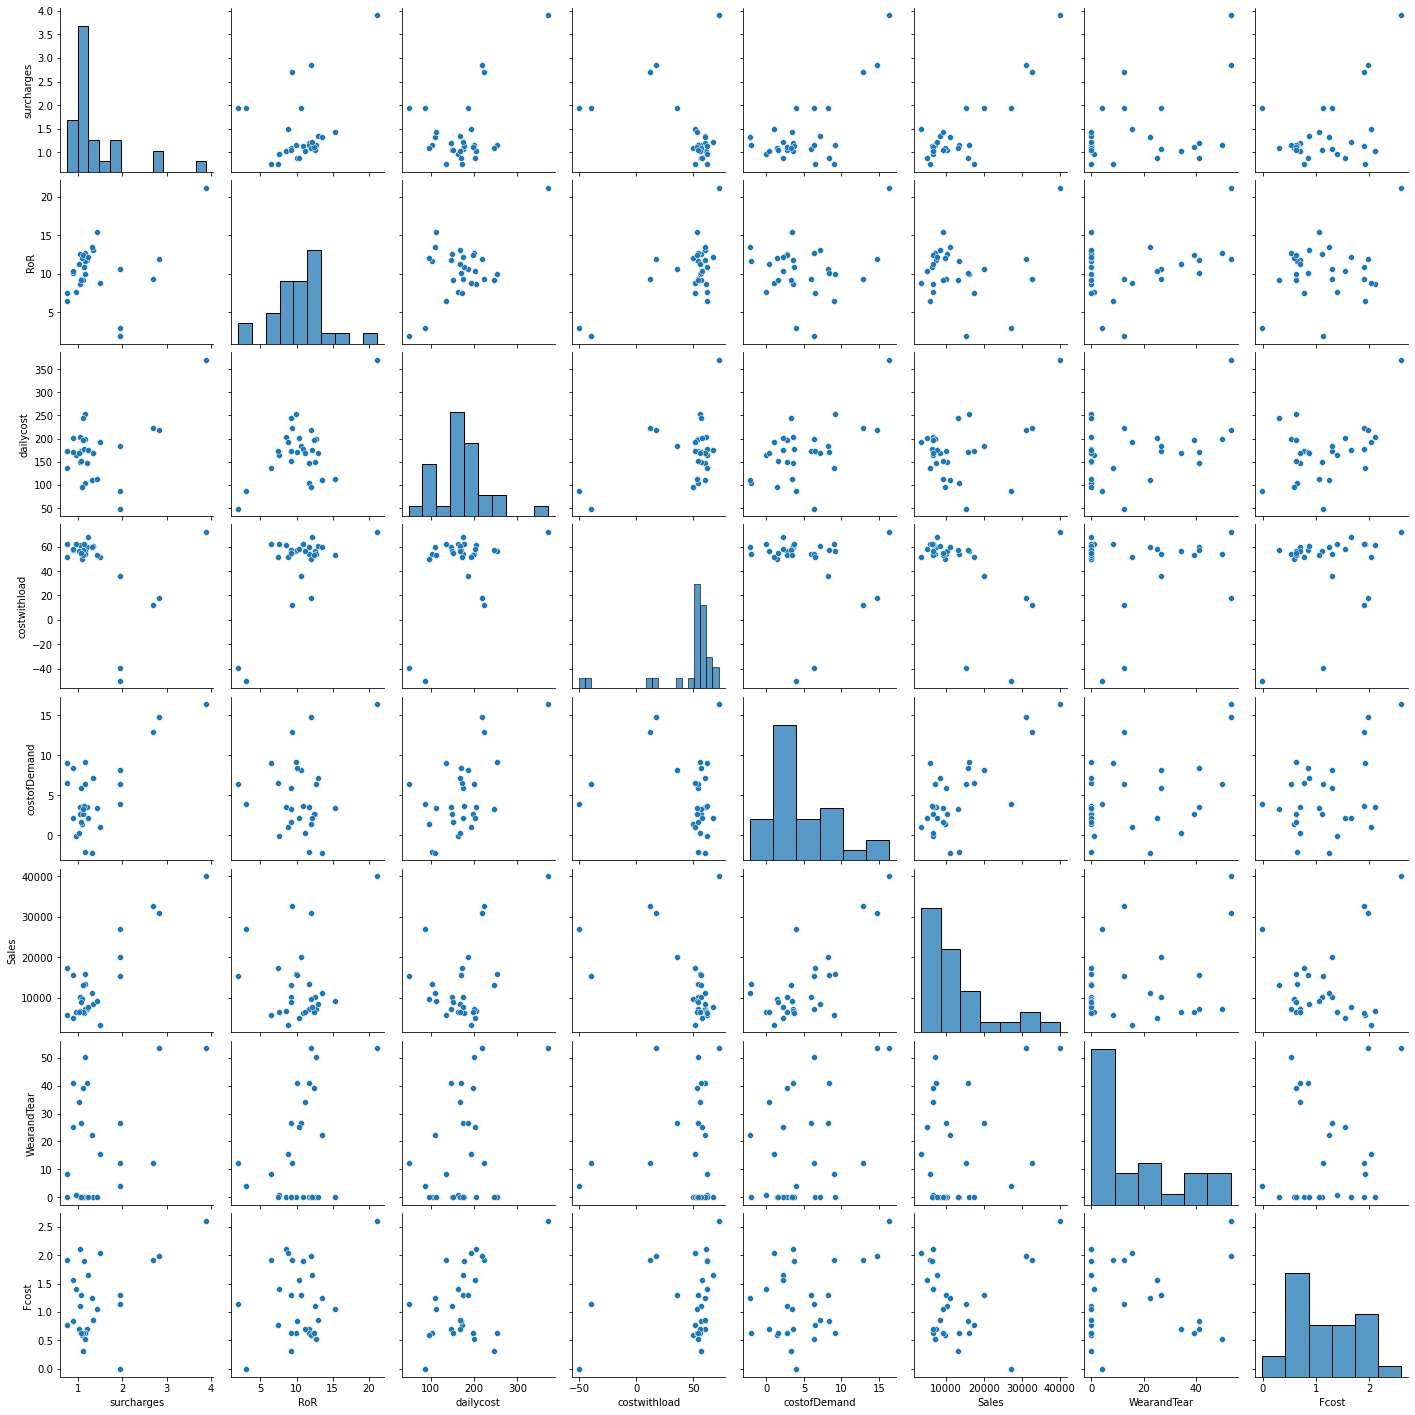

In [38]:
# Visualise dataset using seaborn

X = financials.iloc[:,1:9]

sns.pairplot(X)

In [40]:
# using StandardScaler to scale the dataset

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [41]:
X

array([[ 1.88852661, -0.32235255,  0.8332489 , -1.2515904 ,  1.77905177,
         2.19774632, -0.20533316,  1.17156669],
       [-0.29517641,  0.37433854, -0.41111585,  0.469424  , -0.31313767,
        -0.64019589,  1.34665103, -0.75238379],
       [-0.48443067, -0.3394843 ,  0.02609339,  0.26779888,  0.22103836,
        -0.32710059,  0.5652701 ,  0.21118676],
       [-0.52810473, -0.53935469,  0.53056558,  0.50902893, -0.31313767,
        -0.71127277, -0.86815974,  1.50339231],
       [-0.35340849,  0.34578563, -1.1510084 ,  0.25699753, -1.5595484 ,
         0.05383574, -0.86815974, -0.85767461],
       [-0.51354671,  0.60276185, -0.37748437,  0.35420964, -0.49119635,
        -0.3218563 , -0.86815974, -0.1046857 ],
       [ 0.7966751 ,  0.025993  ,  0.21106653, -0.3910832 ,  0.73295705,
         0.77877521,  0.57065894,  0.20959145],
       [-0.93572929, -1.16751879, -0.61290472,  0.54143297,  0.91101572,
        -0.81571225, -0.42088652,  1.19071048],
       [-0.35340849, -0.16816682

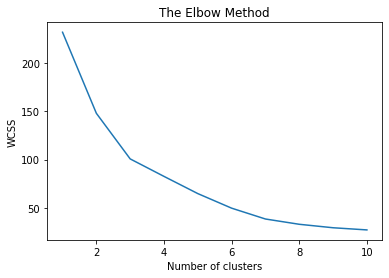

In [42]:
# Using the Elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [44]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2], dtype=int32)

In [46]:
# reducing dimensionality before visualising

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [47]:
# checking for the original variance by returing the explained_variance_ratio and summing up the values

sum(pca.explained_variance_ratio_)

0.7056440181560044

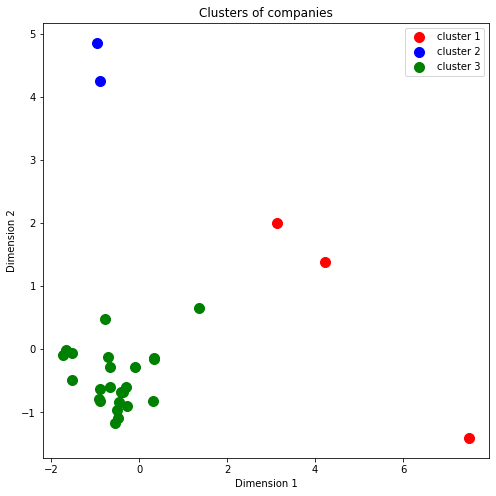

In [50]:
# visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
               s = 100, c = colours[i], label = 'cluster '+str(i+1))
    
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

## Exercise:
  #### Try performing both Agglomerative clustering and DBSCAN on this dataset

In [ ]:
# Solving for Agglomerative clustering


from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)